<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.nus.edu.sg/images/default-source/base/logo.png' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Machine Learning in Python</h1><h2>Lab 1c - Data Understanding and Preparation </h2><h3></h3></th>
    </tr>
</table>

We will be using the bank marketing campaign data. The dataset (`bank.csv`) gives you information about a marketing campaign done by a financial institution. Detailed information (i.e. column description) is provided below.

 * **age :**  age in years
 * **job :**  type of job
 * **marital :**  marital status 
 * **education :**  education background 
 * **default :**  has credit in default? 
 * **balance :**  Balance of the individual
 * **housing :**  has housing loan? 
 * **loan :**  has personal loan? 
 * **contact :**  contact communication type 
 * **day :**  last contact day of the week 
 * **month :**  last contact month of year 
 * **duration :**  last contact duration, in seconds 
 * **campaign :**  number of contacts performed during this campaign and for this client
 * **pdays :**  number of days that passed by after the client was last contacted from a previous campaign 
 * **previous :**  number of contacts performed before this campaign and for this client
 * **poutcome :**  outcome of the previous marketing campaign 
 * <font color='red'> **deposit :** has the client subscribed a term deposit? This is the TARGET variable </font> 

### 1. Data Loading and Exploration

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
# Load dataset into a DataFrame
df = pd.read_csv('bank.csv')

# Create a backup copy of the DataFrame
df_backup = df.copy()

# Show overview of the dataset
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


#### Numeric Data

In [38]:
# numeric data
df_num = df.select_dtypes(['int64', 'float64']).copy()
df_num.head()

age  balance  day  duration  campaign  pdays  previous
0   59     2343    5      1042         1     -1         0
1   56       45    5      1467         1     -1         0
2   41     1270    5      1389         1     -1         0
3   55     2476    5       579         1     -1         0
4   54      184    5       673         2     -1         0

In [39]:
df_num.describe()

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

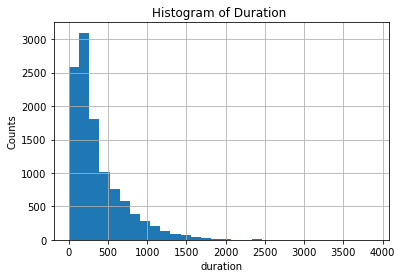

In [40]:
# Visualize Duration
plt.hist(df_num['duration'].dropna(), bins=30)
plt.xlabel('duration')
plt.ylabel('Counts') 
plt.title('Histogram of Duration ')
plt.grid(True)

plt.show()

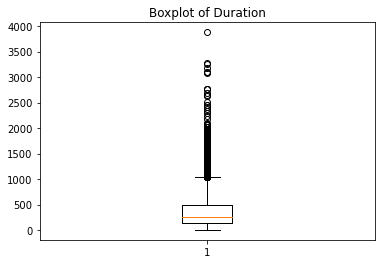

In [41]:
plt.boxplot(df_num['duration'].dropna())
plt.title('Boxplot of Duration')

plt.show()

#### Categorical Data

In [42]:
# categorical data
df_cat = df.select_dtypes(['object']).copy()
df_cat.head()

job  marital  education default housing loan  contact month  \
0      admin.  married  secondary      no     yes   no  unknown   may   
1      admin.  married  secondary      no      no   no  unknown   may   
2  technician  married  secondary      no     yes   no  unknown   may   
3    services  married  secondary      no     yes   no  unknown   may   
4      admin.  married   tertiary      no      no   no  unknown   may   

  poutcome deposit  
0  unknown     yes  
1  unknown     yes  
2  unknown     yes  
3  unknown     yes  
4  unknown     yes

In [43]:
df_cat.describe()

job  marital  education default housing   loan   contact  \
count        11162    11162      11162   11162   11162  11162     11162   
unique          12        3          4       2       2      2         3   
top     management  married  secondary      no      no     no  cellular   
freq          2566     6351       5476   10994    5881   9702      8042   

        month poutcome deposit  
count   11162    11162   11162  
unique     12        4       2  
top       may  unknown      no  
freq     2824     8326    5873

In [10]:
df_cat.nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
deposit       2
dtype: int64

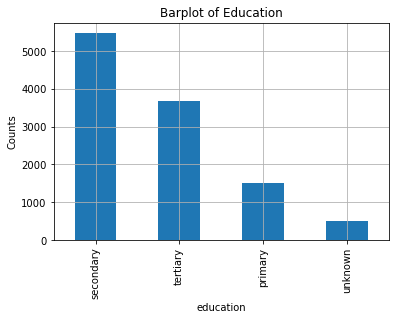

In [44]:
df_cat.education.value_counts().plot.bar()
plt.xlabel('education')
plt.ylabel('Counts') 
plt.title('Barplot of Education')
plt.grid(True)
plt.show()

#### The relationship between data

Text(0.5, 1.0, 'Blance vs. Age')

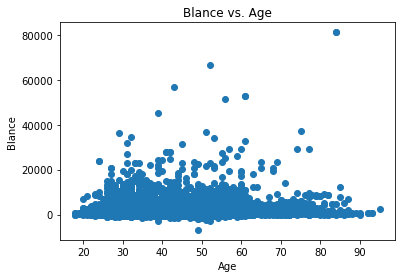

In [47]:
# Balance vs. Age
plt.scatter(df['age'], df['balance'])
plt.xlabel('Age')
plt.ylabel('Blance')
plt.title('Blance vs. Age')

In [48]:
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [49]:
# Deposit vs. Duration
df.groupby('deposit').duration.mean()

deposit
no     223.130257
yes    537.294574
Name: duration, dtype: float64

Text(0, 0.5, 'duration')

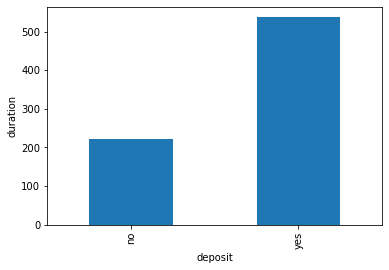

In [50]:
df.groupby('deposit').duration.mean().plot.bar()
plt.ylabel('duration')

In [51]:
df.groupby(['deposit','marital']).duration.mean().unstack(0)

deposit           no         yes
marital                         
divorced  211.266766  587.972669
married   223.978865  539.995644
single    226.186800  516.916318

Text(0, 0.5, 'duration')

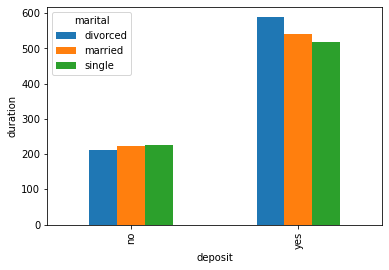

In [52]:
df.groupby(['marital','deposit']).duration.mean().unstack(0).plot.bar()
plt.ylabel('duration')

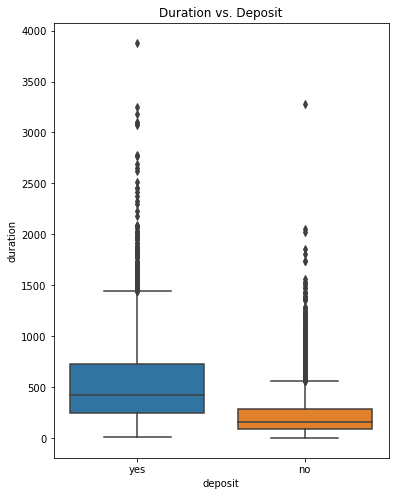

In [53]:
plt.figure(figsize=(6,8))
sns.boxplot(y='duration', x='deposit', data=df)
plt.title('Duration vs. Deposit')
plt.show()

### 2. Missing Values

In [54]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [55]:
df_small = df.iloc[:10,[0, 2, -1]]
df_small

age   marital deposit
0   59   married     yes
1   56   married     yes
2   41   married     yes
3   55   married     yes
4   54   married     yes
5   42    single     yes
6   56   married     yes
7   60  divorced     yes
8   37   married     yes
9   28    single     yes

In [56]:
df_small.iloc[3:5, 0] = np.nan
df_small.iloc[:2, 1] = np.nan
df_small

age   marital deposit
0  59.0       NaN     yes
1  56.0       NaN     yes
2  41.0   married     yes
3   NaN   married     yes
4   NaN   married     yes
5  42.0    single     yes
6  56.0   married     yes
7  60.0  divorced     yes
8  37.0   married     yes
9  28.0    single     yes

* marital: replace the missing value by married (the most freuqent value)

In [57]:
df_small['marital'] = df_small['marital'].fillna('married')
df_small.isnull().sum()

age        2
marital    0
deposit    0
dtype: int64

In [58]:
df_small

age   marital deposit
0  59.0   married     yes
1  56.0   married     yes
2  41.0   married     yes
3   NaN   married     yes
4   NaN   married     yes
5  42.0    single     yes
6  56.0   married     yes
7  60.0  divorced     yes
8  37.0   married     yes
9  28.0    single     yes

* age: replace the missing value by median value 

In [59]:
df_small['age'] = df_small['age'].fillna(df_small['age'].median())
df_small['age']= df_small['age'].astype(int)
df_small.isnull().sum()

age        0
marital    0
deposit    0
dtype: int64

In [60]:
df_small

age   marital deposit
0   59   married     yes
1   56   married     yes
2   41   married     yes
3   49   married     yes
4   49   married     yes
5   42    single     yes
6   56   married     yes
7   60  divorced     yes
8   37   married     yes
9   28    single     yes

### 3. Data Transformation

In [61]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [62]:
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

#### Encode Categorical Data Columns

In [63]:
df['marital'].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [64]:
# marital
df['marital'] = df['marital'].map( {'single': 0, 'married': 1, 'divorced' :2} ).astype(int)
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.        1  secondary      no     2343     yes   no  unknown   
1   56      admin.        1  secondary      no       45      no   no  unknown   
2   41  technician        1  secondary      no     1270     yes   no  unknown   
3   55    services        1  secondary      no     2476     yes   no  unknown   
4   54      admin.        1   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

#### Transform the Numeric Data Columns

In [65]:
df.describe()

age       marital       balance           day      duration  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948      0.800663   1528.538524     15.658036    371.993818   
std       11.913369      0.625552   3225.413326      8.420740    347.128386   
min       18.000000      0.000000  -6847.000000      1.000000      2.000000   
25%       32.000000      0.000000    122.000000      8.000000    138.000000   
50%       39.000000      1.000000    550.000000     15.000000    255.000000   
75%       49.000000      1.000000   1708.000000     22.000000    496.000000   
max       95.000000      2.000000  81204.000000     31.000000   3881.000000   

           campaign         pdays      previous  
count  11162.000000  11162.000000  11162.000000  
mean       2.508421     51.330407      0.832557  
std        2.722077    108.758282      2.292007  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     20.750000      1.000000  
max       63.000000    854.000000     58.000000

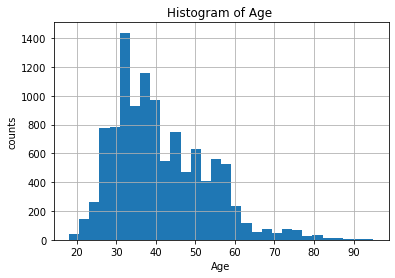

In [66]:
# Age
plt.hist(df['age'], bins=30)
plt.xlabel('Age')
plt.ylabel('counts') 
plt.title('Histogram of Age ')
plt.grid(True)

plt.show()

In [67]:
# Standard Scaling for AGE column
df["age"] = (df["age"] - df["age"].mean()) / df["age"].std()
df.describe()

age       marital       balance           day      duration  \
count  1.116200e+04  11162.000000  11162.000000  11162.000000  11162.000000   
mean   4.923892e-16      0.800663   1528.538524     15.658036    371.993818   
std    1.000000e+00      0.625552   3225.413326      8.420740    347.128386   
min   -1.950074e+00      0.000000  -6847.000000      1.000000      2.000000   
25%   -7.749233e-01      0.000000    122.000000      8.000000    138.000000   
50%   -1.873482e-01      1.000000    550.000000     15.000000    255.000000   
75%    6.520450e-01      1.000000   1708.000000     22.000000    496.000000   
max    4.513253e+00      2.000000  81204.000000     31.000000   3881.000000   

           campaign         pdays      previous  
count  11162.000000  11162.000000  11162.000000  
mean       2.508421     51.330407      0.832557  
std        2.722077    108.758282      2.292007  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     20.750000      1.000000  
max       63.000000    854.000000     58.000000

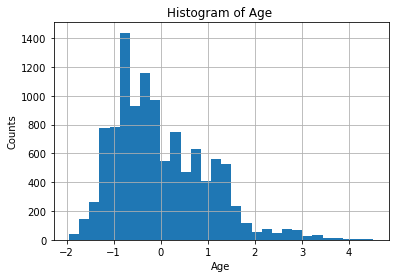

In [68]:
# Age after normalization
plt.hist(df['age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Counts') 
plt.title('Histogram of Age ')
plt.grid(True)

plt.show()

### 6. Exercise

In [3]:
# Task 1: Use histogram to visualize the balance column
data = pd.read_csv('bank.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
data_balance = data["balance"]
data_balance

0        2343
1          45
2        1270
3        2476
4         184
         ... 
11157       1
11158     733
11159      29
11160       0
11161       0
Name: balance, Length: 11162, dtype: int64

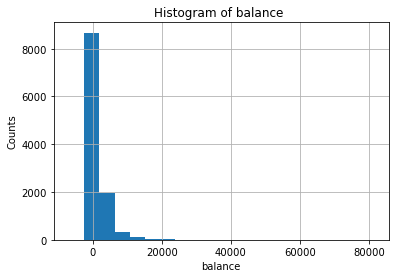

In [6]:
plt.hist(data_balance, bins=20)
plt.xlabel('balance')
plt.ylabel('Counts') 
plt.title('Histogram of balance ')
plt.grid(True)

plt.show()

Text(0.5, 1.0, 'duration vs. balance')

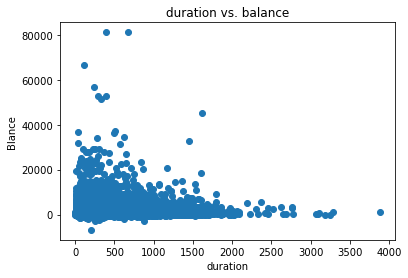

In [7]:
# Task 2: Use Scatter Plot to visualise the relationship between duration vs. balance.
plt.scatter(data['duration'], data['balance'])
plt.xlabel('duration')
plt.ylabel('Blance')
plt.title('duration vs. balance')

In [8]:
# Task 3: Plot a bar chart to visualize the average amount of duration at different poutcome
data.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

Text(0, 0.5, 'duration')

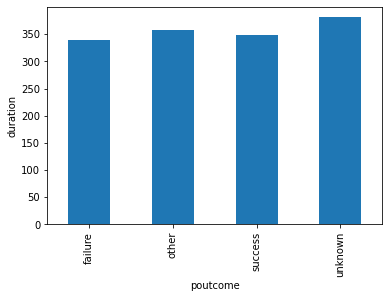

In [9]:
data.groupby('poutcome').duration.mean().plot.bar()
plt.ylabel('duration')

In [10]:
# Task 4: Encode the poutcome Column into Numbers (Integers)

In [11]:
data0 = data.copy()

In [12]:
data0['poutcome'].isnull().sum()

0

In [15]:
data_ = data0[(data0['poutcome'] != 'failure') & (data0['poutcome'] != 'success') & (data0['poutcome'] != 'other') & (data0['poutcome'] != 'unknown')]
data_

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, deposit]
Index: []

In [16]:
data0['poutcome'] = data0['poutcome'].map( {'failure': 0, 'success': 1, 'other' :2, 'unknown' :-1} ).astype(int)
data0

age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous  poutcome  \
0       unknown    5   may      1042         1     -1         0        -1   
1       unknown    5   may      1467         1     -1         0        -1   
2       unknown    5   may      1389         1     -1         0        -1   
3       unknown    5   may       579         1     -1         0        -1   
4       unknown    5   may       673         2     -1         0        -1   
...         ...  ...   ...       ...       ...    ...       ...       ...   
11157  cellular   20   apr       257         1     -1         0        -1   
11158   unknown   16   jun        83         4     -1         0        -1   
11159  cellular   19   aug       156         2     -1         0        -1   
11160  cellular    8   may         9         2    172         5         0   
11161  cellular    9   jul       628         1     -1         0        -1   

      deposit  
0         yes  
1         yes  
2         yes  
3         yes  
4         yes  
...       ...  
11157      no  
11158      no  
11159      no  
11160      no  
11161      no  

[11162 rows x 17 columns]